In [1]:
import compnal
import math
import matplotlib.pyplot as plt
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [2]:
degree = 3
J = -1.0
lattice = compnal.lattice.Chain(system_size=100, boundary_condition=compnal.lattice.BoundaryCondition.PBC)
model = compnal.model.make_polynomial_ising(lattice=lattice, interaction={degree: J})

In [3]:
solver = compnal.solver.ClassicalMonteCarlo(model=model, updater=compnal.solver.Updater.HEAT_BATH)
solver.num_sweeps = 100000
solver.num_samples = 200000
solver.num_threads = 10
solver.beta = 1.0
solver.run()

In [4]:
index_end = 31
origin = 0
index_list = [i for i in range(index_end)]
correlation = solver.calculate_correlation_list(origin=origin, index_list=index_list)

theory = [abs(math.tanh(solver.beta*J))**(2.0*r/degree) for r in index_list]

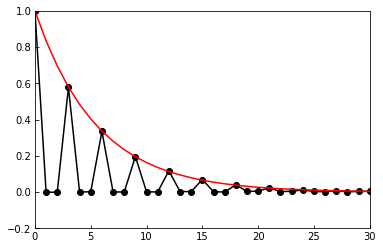

In [5]:
plt.plot(index_list, correlation, marker="o", color="black")
plt.plot(index_list, theory, color="red")
plt.xlim(0, 30)
plt.ylim(-0.2, 1.0)
plt.savefig("out.eps")

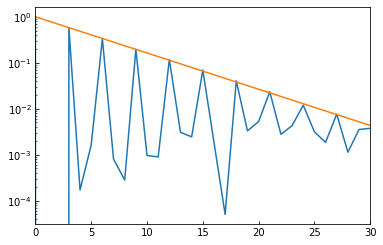

In [6]:
plt.plot(index_list, correlation)
plt.plot(index_list, theory)
plt.xlim(0, 30)
plt.yscale("log")